In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.colors as plt_colors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns

In [2]:
# TODO:
# - [x] 01-Load Wine dataset (scikit library)
# - [x] 02-Select the first two attributes for a 2D representation of the image.
# - [x] 03-Randomly split data into train, validation and test sets in proportion 5:2:3
# 
# KNN
# - [x] 04-For K = 1,3, 5,7 
#         a. Apply K-Nearest Neighbors
#         b. Plot the data and the decision boundaries
#         c. Evaluate the method on the validation set
# - [x] 05-Plot a graph showing how the accuracy on the validation set varies when changing K
# - [ ] 06-How the boundaries change? Why?
# - [ ] 07-Use the best value of K and evaluate the model on the test set. How well does it works?
# 
# LinearSVM
# - [ ] 08-For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:
#         a. Train a linear SVM on the training set
#         b. Plot the data and the decision boundaries
#         c. Evaluate the method on the validation set
# - [ ] 09-Plot a graph showing how the accuracy on the validation set varies when changing C
# - [ ] 10-How the boundaries change? Why?
# - [ ] 11-Use the best value of C and evaluate the model on the test set. How well does it work?
# 
# RBFSVM
# - [ ] 12-Repeat point 8. (train, plot, etc..), but this time use an RBF kernel
# - [ ] 13-Evaluate the best C on the test set
# - [ ] 14-Are there any differences compared to the linear kernel? How are the boundaries different?
# 
# Gridsearch
# - [ ] 15-Perform a grid search of the best parameters for an RBF kernel:
#          we will now tune both gamma and C at the same time.
#          Select an appropriate range for both parameters.
#          Train the model and score it on the validation set.
#          Evaluate the best parameters on the test set.
#          Plot the decision boundaries.
# - [ ] 16-Merge the training and validation split. You should now have 70% training and 30% test data.
# K-Fold
# - [ ] 17. Repeat the grid search for gamma and C but this time perform 5-fold validation.
# - [ ] 18. Evaluate the parameters on the test set. Is the final score different? Why?
# 
# Extra : only once you finish the main requests
# - [ ] 19. Discuss the difference between KNN and SVM
# - [ ] 20. Try also with different pairs of attributes
# 


01 - Load Wine dataset (scikit library)

02 - Select the first two attributes for a 2D representation of the image.

In [3]:
#01-Load Wine dataset (scikit library)
#02-Select the first two attributes for a 2D representation of the image.
data = load_wine()
features = data['data'][:, :2]
labels = data['target']
df = pd.DataFrame(data=features[:, :2], columns=data.feature_names[:2])
df.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


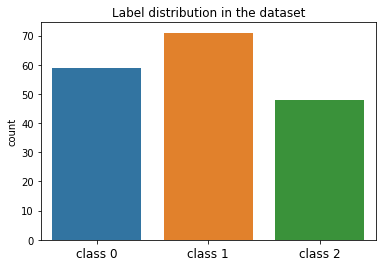

In [4]:
# plot the distribution of the labels in the dataset
#sns.set()
colors = ["windows blue", "amber", "faded green"]
ax = sns.countplot(labels,);
ax.set_xticklabels(["class 0", "class 1", "class 2"], 
                   #rotation='vertical', 
                   fontsize=12)
ax.set_title("Label distribution in the dataset"); # TODO: è corretto come titolo?

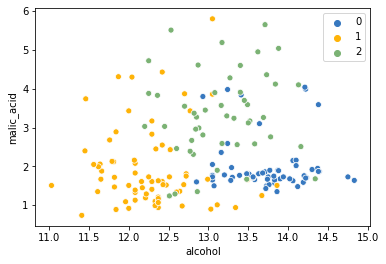

In [5]:
# Plot the first two features
# TODO: choose the best way to do it between the two
# TODO: adjust the plot's legend 

colors = ["windows blue", "amber", "faded green"]
attributes = data.feature_names[0:2]
g = sns.scatterplot(x= attributes[0],
                    y= attributes[1],
                    hue= labels, 
                    palette=sns.xkcd_palette(colors),
                    data=df)

#legend = ax.legend()
#plt.legend(title='Classes', labels=['class_1', 'class_2', 'class_3'])
plt.show(g)

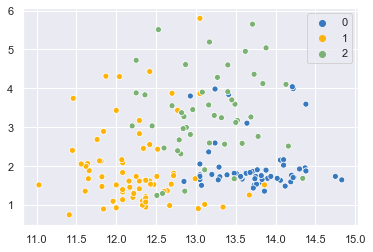

In [6]:
sns.set()
sns.xkcd_palette(colors)
sns.scatterplot(x=features[:, 0], 
                y=features[:,1], 
                hue=labels, 
                #style=labels, 
                palette=sns.xkcd_palette(colors))
#plt.legend(title='Classes', labels=['class 0','class 1','class 2'])

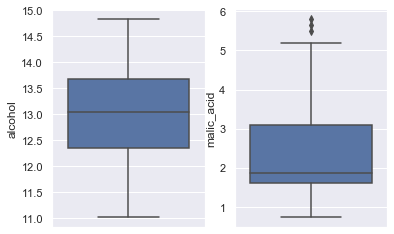

In [7]:
data_to_plot = df.iloc[:, :2]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
#plt.subplots_adjust(right=3, wspace=1)
for i, col in enumerate(data_to_plot.columns):
    sns.boxplot(y=data_to_plot[col], ax = ax[i])

In [8]:
# TODO: add some boxplot  possible reference https://code-maven.com/predicting-wine-cultivar \
#       look for others EDA on the wine dataset
means = np.mean(df.iloc[:,0:2]).round(2)
std_dev = np.std(df.iloc[:, 0:2]).round(2)
print(f"Feature '{attributes[0]}':\tmean:{means[0]}\tstd dev:{std_dev[0]}")
print(f"Feature '{attributes[1]}':\tmean:{means[1]}\tstd dev:{std_dev[1]}")

Feature 'alcohol':	mean:13.0	std dev:0.81
Feature 'malic_acid':	mean:2.34	std dev:1.11


#### 03-Randomly split data into train, validation and test sets in proportion 5:2:3

In [9]:
def train_validation_test_split(X, y, train_size=0.5, val_size=0.2, test_size=0.3, shuffle=True, random_state=None):
    if (train_size + test_size + val_size != 1.0):
        raise ValueError("The parameters train_size, test_size, val_size do not sum to 1.0")
    if train_size == 0. or test_size == 0. or val_size == 0.:
        raise ValueError("One of parameters train_size, test_size, val_size is equal to 0.0")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size= test_size, 
                                                        shuffle=shuffle, 
                                                        random_state=random_state) 
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                      train_size= train_size/(train_size+val_size), 
                                                      shuffle=False,  # the data is already shuffled from the previous train_test_split
                                                                      # TODO: is it necessary to shuffle again?
                                                      #random_state=random_state
                                                    )
    return X_train, X_val, X_test, y_train, y_val, y_test

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test = \
    train_validation_test_split(features, labels, random_state=42) 
X_train.shape, X_val.shape, X_test.shape

((88, 2), (36, 2), (54, 2))

In [11]:
# Normalize the data -> mean = 0 and variance = 1
# TODO: use RobustScaler() -> no see boxplots

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

X_train_full = np.vstack((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))
scaler.fit(X_train_full)
X_train_full_std = scaler.transform(X_train_full)
X_test_full_std = scaler.transform(X_test)

print(f"X_train_std: mean: {X_train_std.mean().round(3)}, std_dev: { X_train_std.std().round(3)}")
print(f"X_train_full_std: mean: {X_train_full_std.mean().round(3)}, std_dev: { X_train_full_std.std().round(3)}")


X_train_std: mean: -0.0, std_dev: 1.0
X_train_full_std: mean: 0.0, std_dev: 1.0


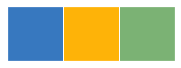

In [12]:
colors = ["windows blue", "amber", "faded green"]
sns.palplot(sns.xkcd_palette(colors))
sns.set_palette(sns.xkcd_palette(colors))

In [13]:

def plot_decision_function(X, y, clf, ax, title=None, x_label=None, y_label=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #colors = ["windows blue", "amber", "faded green"]
    #sns.set_palette(sns.xkcd_palette(colors))
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k') # TODO: add cmap to modify
        
    if title is not None:
        ax.title.set_text(title)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
  

### K-NN Classifier

In [14]:
# 04-For K = [1,3, 5,7]: 
#       a. Apply K-Nearest Neighbors
#       b. Plot the data and the decision boundaries
#       c. Evaluate the method on the validation set

# a. Apply K-Nearest Neighbors
k_values = [1, 3, 5, 7]
knn = {}
for k in k_values:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train_std, y_train)
    knn[k] = knn_

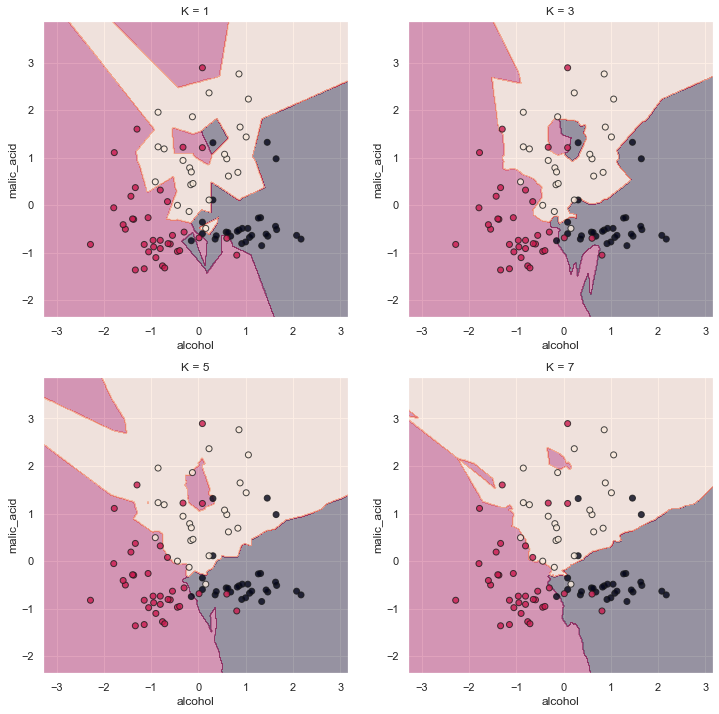

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for k, ax_ in zip(k_values, ax.flatten()):
    #fig, ax[i] = plt.subplots(figsize=(10,10))
    plot_decision_function(X_train_std, y_train, knn[k], ax_, 
                           f"K = {k}", data.feature_names[0], data.feature_names[1]);


In [16]:
# c. Evaluate the method on the validation set
#TODO: other metrics? These could be helpful to evaluate better what changes between the various hyperparameters
pred = {k: v.predict(X_val_std) for k, v in knn.items()}
acc = {k: accuracy_score(y_val, v) for k, v in pred.items()}
print(acc)


from sklearn.metrics import precision_recall_fscore_support
prfs = {k: precision_recall_fscore_support(y_val, v) for k, v in pred.items()}

for k in k_values:
    print(f"k = {k} : {prfs[k][:]}")



{1: 0.6666666666666666, 3: 0.75, 5: 0.8055555555555556, 7: 0.7777777777777778}
k = 1 : (array([0.6       , 0.70588235, 0.75      ]), array([0.81818182, 0.85714286, 0.27272727]), array([0.69230769, 0.77419355, 0.4       ]), array([11, 14, 11]))
k = 3 : (array([0.76923077, 0.70588235, 0.83333333]), array([0.90909091, 0.85714286, 0.45454545]), array([0.83333333, 0.77419355, 0.58823529]), array([11, 14, 11]))
k = 5 : (array([0.83333333, 0.75      , 0.875     ]), array([0.90909091, 0.85714286, 0.63636364]), array([0.86956522, 0.8       , 0.73684211]), array([11, 14, 11]))
k = 7 : (array([0.76923077, 0.84615385, 0.7       ]), array([0.90909091, 0.78571429, 0.63636364]), array([0.83333333, 0.81481481, 0.66666667]), array([11, 14, 11]))


In [17]:
# KNeighborsClassifier.score is the same as sklearn.metrics.accuracy_score
scores = {k: v.score(X_val_std, y_val) for k, v in knn.items()}
print(scores)

{1: 0.6666666666666666, 3: 0.75, 5: 0.8055555555555556, 7: 0.7777777777777778}


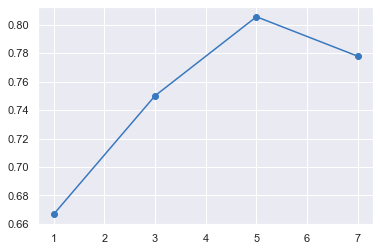

In [18]:
# 05-Plot a graph showing how the accuracy on the validation set varies when changing K
fig, ax = plt.subplots()
ax.plot(k_values, list(scores.values()), '-o')

06-How the boundaries change? Why?

07-Use the best value of K and evaluate the model on the test set. How well does it works?

In [19]:
# 07-Use the best value of K and evaluate the model on the test set. How well does it works?
{k: knn[k].score(X_test_std, y_test) for k in knn.keys()}

{1: 0.7222222222222222,
 3: 0.7962962962962963,
 5: 0.7592592592592593,
 7: 0.7962962962962963}

## LinearSVC 

In [20]:
#08-For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:
#        a. Train a linear SVM on the training set
#        b. Plot the data and the decision boundaries
#        c. Evaluate the method on the validation set    

#a. Train a linear SVM on the training se
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_svc_dict = {c: SVC(kernel='linear', C=c).fit(X_train_std, y_train) for c in C_values}


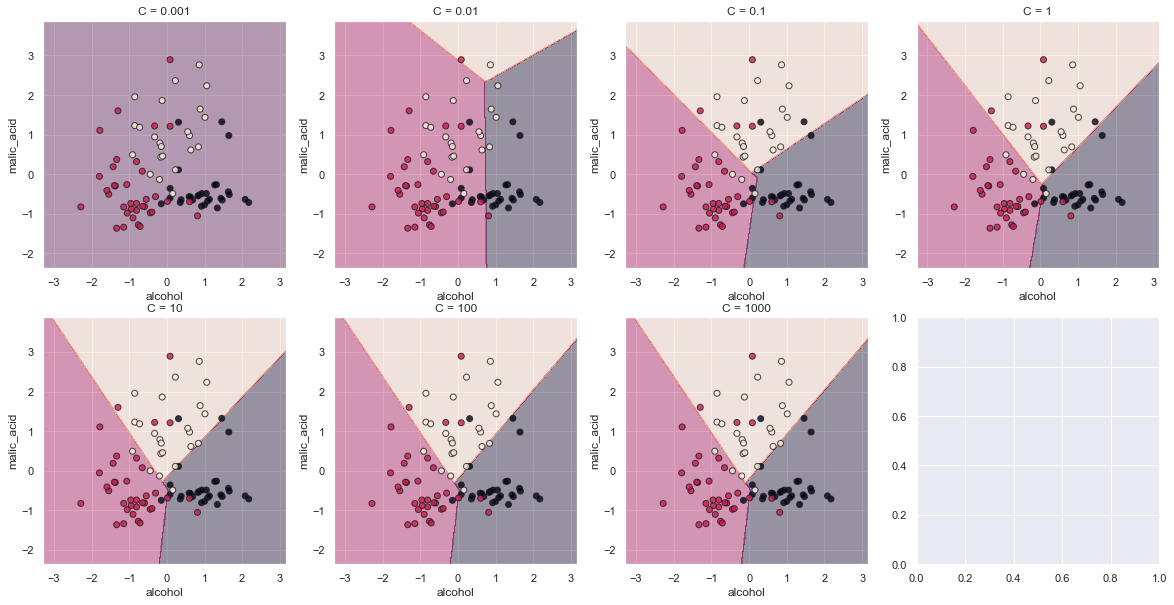

In [21]:
#b. Plot the data and the decision boundaries
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for c, ax_ in zip(C_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, linear_svc_dict[c], ax_, 
                           f"C = {c}", data.feature_names[0], data.feature_names[1]);


In [22]:
linear_svc_scores_val = {c:svc.score(X_val_std, y_val) for c, svc in linear_svc_dict.items()}
print(linear_svc_scores_val)

{0.001: 0.3888888888888889, 0.01: 0.5277777777777778, 0.1: 0.6944444444444444, 1: 0.7777777777777778, 10: 0.8055555555555556, 100: 0.8055555555555556, 1000: 0.8055555555555556}


# TODO: 
# 10-How the boundaries change? Why?
Idee: spiegare come un SVC multiclass funziona, quindi OVA and OVR, spiegare che essendo lineare l'SVM tenta di trovare l'iperpiano che separa meglio le due classi, in questo caso specifico visto che stiamo usando due sole feature cerca la linea che separe le due zone del piano con il margine migliore.
Al variare di C osserviamo diversi scenari. 
C=0.001 gli errori non sono praticamente quasi ammessi e SVM non riesce a trovare una soluzione per il problema (?)
C=0.01, 0.1 "dando la possibilità" all'algoritmo di commettere degli errori ci troviamo nella situazione in cui finalmente il classificatore trova le tre linee che separano il piano in tre regioni distinte 
C=1, 10 la differenza principale tra questi due valori è legata a come viene gestita la zona centale del piano i
C=100, 1000 da 100 a 1000 non osserviamo ulteriori cambiamenti nei boundaries 

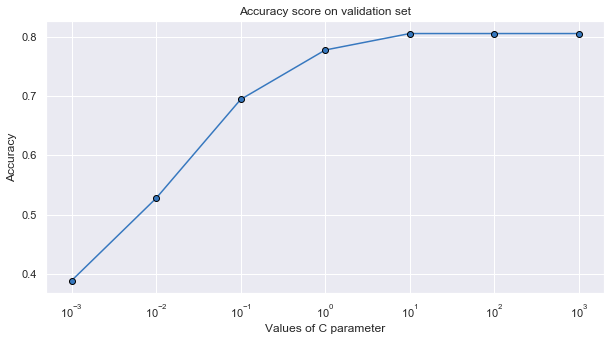

In [23]:
#     c. Evaluate the method on the validation set 
# 09-Plot a graph showing how the accuracy on the validation set varies when changing C

# TODO: zoom around the value 10?
#plot Accuracy vs C value
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Values of C parameter')
ax.set_ylabel('Accuracy')
plt.xticks(C_values)
plt.xscale('log')
ax.set_title("Accuracy score on validation set")
ax.plot(C_values, list(linear_svc_scores_val.values()), marker = 'o', markeredgecolor= 'black');

In [24]:
{c: svc.score(X_test_std, y_test) for c, svc in linear_svc_dict.items()}

{0.001: 0.3888888888888889,
 0.01: 0.6111111111111112,
 0.1: 0.7407407407407407,
 1: 0.7407407407407407,
 10: 0.7777777777777778,
 100: 0.7962962962962963,
 1000: 0.7962962962962963}

In [25]:
precision_recall_fscore_support(y_test, linear_svc_dict[10].predict(X_test_std))

(array([0.70833333, 0.94117647, 0.69230769]),
 array([0.89473684, 0.76190476, 0.64285714]),
 array([0.79069767, 0.84210526, 0.66666667]),
 array([19, 21, 14]))

# TODO:
# 11-Use the best value of C and evaluate the model on the test set. How well does it work?
10: 0.777777777777777 --> miglior C sul validation test
L'accuracy è diminuita da 0.81 a 0.78  




## RBF SVC

In [26]:
# 12-Repeat point 8. (train, plot, etc..), but this time use an RBF kernel
rbf_svc_dict = {c: SVC(C=c, kernel='rbf').fit(X_train_std, y_train) for c in C_values}
print({c: svc.score(X_val_std, y_val) for c, svc in rbf_svc_dict.items()})

{0.001: 0.3888888888888889, 0.01: 0.3888888888888889, 0.1: 0.7777777777777778, 1: 0.7777777777777778, 10: 0.7777777777777778, 100: 0.7222222222222222, 1000: 0.6944444444444444}


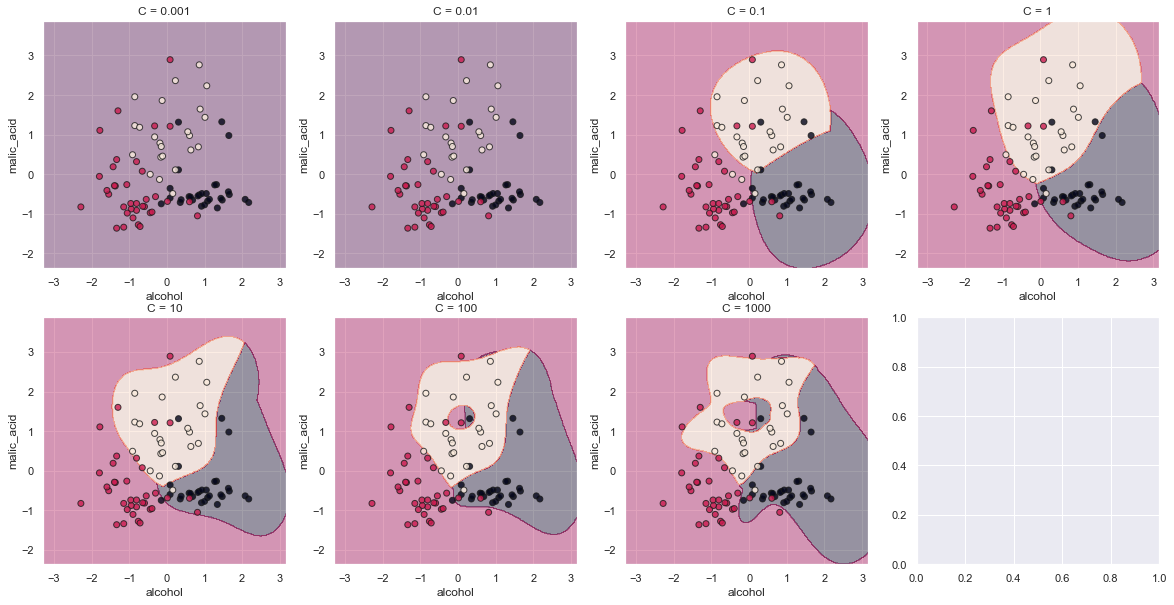

In [27]:
#b. Plot the data and the decision boundaries
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for c, ax_ in zip(C_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, rbf_svc_dict[c], ax_, 
                           f"C = {c}", data.feature_names[0], data.feature_names[1]);

In [28]:
rbf_svc_scores_val = {c: svc.score(X_val_std, y_val) for c, svc in rbf_svc_dict.items()}
print(rbf_svc_scores_val)

{0.001: 0.3888888888888889, 0.01: 0.3888888888888889, 0.1: 0.7777777777777778, 1: 0.7777777777777778, 10: 0.7777777777777778, 100: 0.7222222222222222, 1000: 0.6944444444444444}


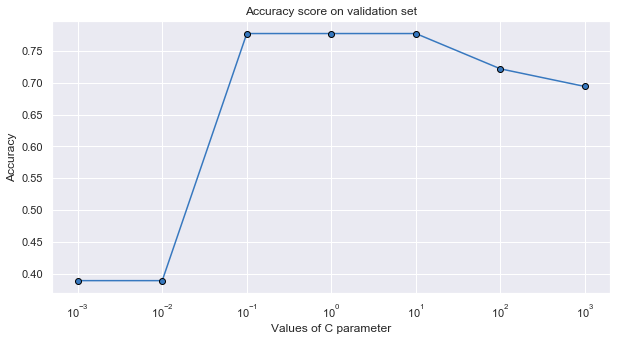

In [29]:
#plot Accuracy vs C value
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Values of C parameter')
ax.set_ylabel('Accuracy')
plt.xticks(C_values)
plt.xscale('log')
ax.set_title("Accuracy score on validation set")
ax.plot(C_values, list(rbf_svc_scores_val.values()), marker = 'o', markeredgecolor= 'black');

In [30]:
# 13-Evaluate the best C on the test set
{c: svc.score(X_test_std, y_test) for c, svc in rbf_svc_dict.items()}

{0.001: 0.3888888888888889,
 0.01: 0.3888888888888889,
 0.1: 0.7777777777777778,
 1: 0.8148148148148148,
 10: 0.7962962962962963,
 100: 0.8148148148148148,
 1000: 0.7962962962962963}

In [31]:
rbf_svc_dict[1]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#TODO:
# 14-Are there any differences compared to the linear kernel? How are the boundaries different?
Boundaries diversi perché lavoriamo con un kernel non lineare che quindi permette di proiettare le feature in un altro spazio e trovare in questo nuovo spazio gli hyperplane che separano meglio le realizzazioni del dataset

In [32]:
from GridSearch import GridSearch

Fitting 2772


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2772 out of 2772 | elapsed:    4.1s finished


{'C': 0.6, 'gamma': 0.9}
SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8055555555555556


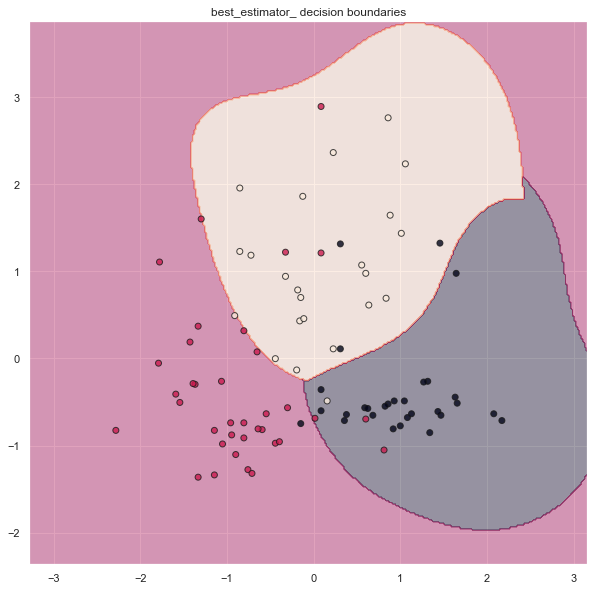

In [33]:
param_grid = {'C': list(np.arange(0.1, 10.5, 0.5)) + C_values,
              'gamma': np.arange(0.01, 1, 0.01)}

gridsearch = GridSearch(SVC(), param_grid, scoring='accuracy', n_jobs=-1, verbose=True)

res = gridsearch.fit(X_train_std, y_train, X_val_std, y_val)
print(res.best_params_)
print(res.best_estimator_)
print(res.best_score_)

#%%

fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_std, y_train, res.best_estimator_, ax, title="best_estimator_ decision boundaries")

In [34]:
#Gridsearch
#- [ ] 15-Perform a grid search of the best parameters for an RBF kernel:
#         we will now tune both gamma and C at the same time.
#         Select an appropriate range for both parameters.
#         Train the model and score it on the validation set.
#         Evaluate the best parameters on the test set.
#         Plot the decision boundaries.


In [35]:
res.best_estimator_.score(X_val_std, y_val)

0.8055555555555556

In [36]:
res.best_estimator_.score(X_test_std, y_test)

0.8148148148148148

## [ ] 16-Merge the training and validation split. You should now have 70% training and 30% test data.
##    K-Fold
## [ ] 17. Repeat the grid search for gamma and C but this time perform 5-fold validation.

## TODO: 
## [ ] 18. Evaluate the parameters on the test set. Is the final score different? Why?

In [37]:
from sklearn.model_selection import KFold, GridSearchCV
kfold = KFold(5)
gridsearchCV = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=kfold, n_jobs=-1, verbose=True)
resCV = gridsearchCV.fit(X_train_full_std, y_train_full)

Fitting 5 folds for each of 2772 candidates, totalling 13860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 8712 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 13860 out of 13860 | elapsed:   13.5s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
print(resCV.best_params_)
print(resCV.best_estimator_)
print(resCV.best_score_)

{'C': 3.1, 'gamma': 0.09}
SVC(C=3.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8306451612903226


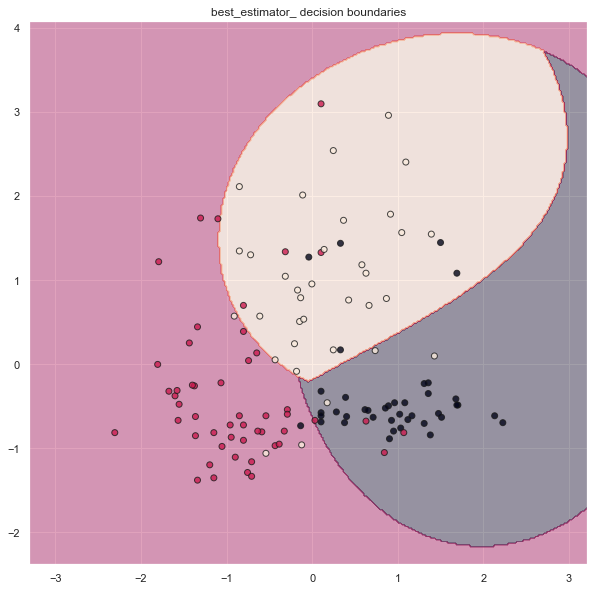

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_full_std, y_train_full, resCV.best_estimator_, ax, title="best_estimator_ decision boundaries")

In [40]:
resCV.best_estimator_.score(X_train_full_std, y_train_full)

0.8306451612903226

In [41]:
resCV.best_estimator_.score(X_test_full_std, y_test)

0.7962962962962963

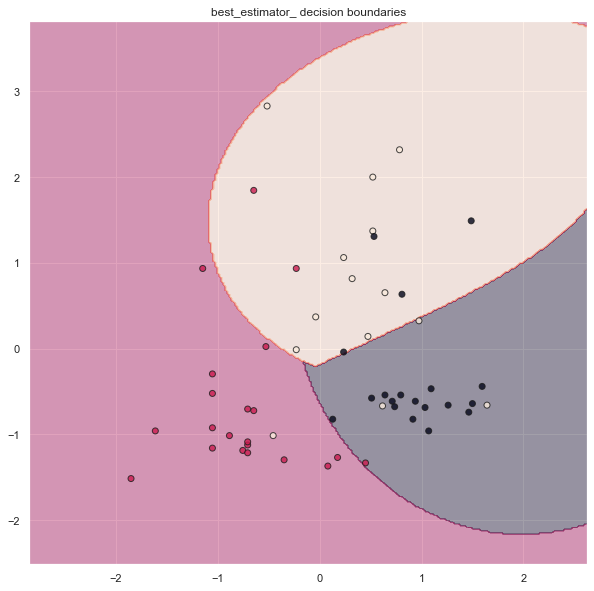

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_test_full_std, y_test, resCV.best_estimator_, ax, title="best_estimator_ decision boundaries")

In [43]:
precision_recall_fscore_support(y_test, res.best_estimator_.predict(X_test_full_std), average='weighted')

(0.8189300411522633, 0.7962962962962963, 0.802557365057365, None)

In [44]:
##TODO:
#Extra : only once you finish the main requests
# [ ] 19. Discuss the difference between KNN and SVM



In [45]:
"""
Gridsearch
- [ ] 15-Perform a grid search of the best parameters for an RBF kernel:
         we will now tune both gamma and C at the same time.
         Select an appropriate range for both parameters.
         Train the model and score it on the validation set.
         Evaluate the best parameters on the test set.
         Plot the decision boundaries.
- [ ] 16-Merge the training and validation split. You should now have 70% training and 30% test data.
K-Fold
- [ ] 17. Repeat the grid search for gamma and C but this time perform 5-fold validation.
- [ ] 18. Evaluate the parameters on the test set. Is the final score different? Why?

Extra : only once you finish the main requests
- [ ] 19. Discuss the difference between KNN and SVM https://www.ijraset.com/fileserve.php?FID=11852
- [ ] 20. Try also with different pairs of attributes

"""

'\nGridsearch\n- [ ] 15-Perform a grid search of the best parameters for an RBF kernel:\n         we will now tune both gamma and C at the same time.\n         Select an appropriate range for both parameters.\n         Train the model and score it on the validation set.\n         Evaluate the best parameters on the test set.\n         Plot the decision boundaries.\n- [ ] 16-Merge the training and validation split. You should now have 70% training and 30% test data.\nK-Fold\n- [ ] 17. Repeat the grid search for gamma and C but this time perform 5-fold validation.\n- [ ] 18. Evaluate the parameters on the test set. Is the final score different? Why?\n\nExtra : only once you finish the main requests\n- [ ] 19. Discuss the difference between KNN and SVM https://www.ijraset.com/fileserve.php?FID=11852\n- [ ] 20. Try also with different pairs of attributes\n\n'

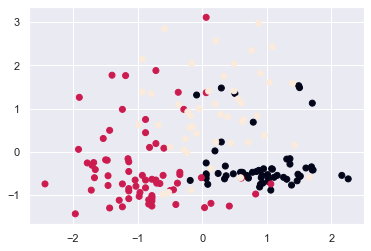

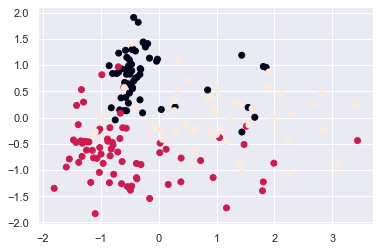

In [46]:
#Possible use of PCA as the other two features 
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(features)
features_std = scaler.transform(features)
fig, ax = plt.subplots()
ax.scatter(features_std[:, 0], features_std[:, 1], c=labels)

pca = PCA(2)
pca.fit(features)
features_pca = pca.transform(features)
fig, ax = plt.subplots()
ax.scatter(features_pca[:, 0], features_pca[:, 1], c=labels)

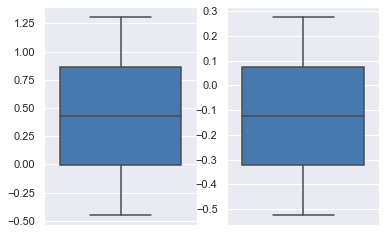

In [47]:
data_to_plot = features_pca
fig, ax = plt.subplots(ncols=2)
sns.boxplot(y=features_pca[0], ax = ax[0])
sns.boxplot(y=features_pca[1], ax = ax[1])

In [48]:
X_train, X_val, X_test, y_train, y_val, y_test = \
    train_validation_test_split(features_pca, labels, random_state=42) 
X_train.shape, X_val.shape, X_test.shape

((88, 2), (36, 2), (54, 2))

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

X_train_full = np.vstack((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))
scaler.fit(X_train_full)
X_train_full_std = scaler.transform(X_train_full)
X_test_full_std = scaler.transform(X_test)

print(f"X_train_std: mean: {X_train_std.mean().round(3)}, std_dev: { X_train_std.std().round(3)}")
print(f"X_train_full_std: mean: {X_train_full_std.mean().round(3)}, std_dev: { X_train_full_std.std().round(3)}")

X_train_std: mean: 0.0, std_dev: 1.0
X_train_full_std: mean: -0.0, std_dev: 1.0


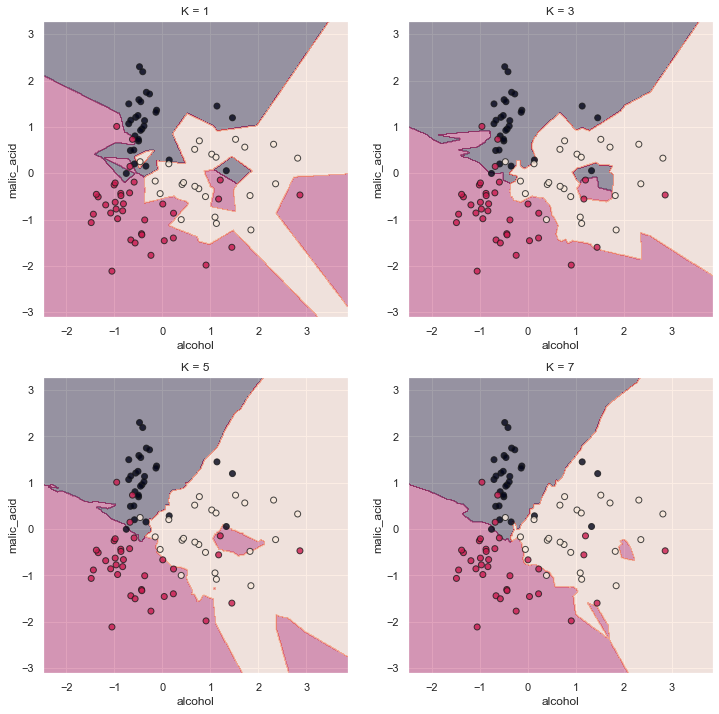

In [50]:
# KNN
# 04-For K = [1,3, 5,7]: 
#       a. Apply K-Nearest Neighbors
#       b. Plot the data and the decision boundaries
#       c. Evaluate the method on the validation set

# a. Apply K-Nearest Neighbors
k_values = [1, 3, 5, 7]
knn = {}
for k in k_values:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train_std, y_train)
    knn[k] = knn_
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for k, ax_ in zip(k_values, ax.flatten()):
    #fig, ax[i] = plt.subplots(figsize=(10,10))
    plot_decision_function(X_train_std, y_train, knn[k], ax_, 
                           f"K = {k}", data.feature_names[0], data.feature_names[1]);

In [51]:
# c. Evaluate the method on the validation set
#TODO: other metrics? These could be helpful to evaluate better what changes between the various hyperparameters
pred = {k: v.predict(X_val_std) for k, v in knn.items()}
acc = {k: accuracy_score(y_val, v) for k, v in pred.items()}
print(acc)


from sklearn.metrics import precision_recall_fscore_support
prfs = {k: precision_recall_fscore_support(y_val, v) for k, v in pred.items()}

for k in k_values:
    print(f"k = {k} : {prfs[k][:]}")

{1: 0.6388888888888888, 3: 0.7222222222222222, 5: 0.7777777777777778, 7: 0.7777777777777778}
k = 1 : (array([0.57142857, 0.70588235, 0.6       ]), array([0.72727273, 0.85714286, 0.27272727]), array([0.64      , 0.77419355, 0.375     ]), array([11, 14, 11]))
k = 3 : (array([0.76923077, 0.6875    , 0.71428571]), array([0.90909091, 0.78571429, 0.45454545]), array([0.83333333, 0.73333333, 0.55555556]), array([11, 14, 11]))
k = 5 : (array([0.83333333, 0.73333333, 0.77777778]), array([0.90909091, 0.78571429, 0.63636364]), array([0.86956522, 0.75862069, 0.7       ]), array([11, 14, 11]))
k = 7 : (array([0.76923077, 0.84615385, 0.7       ]), array([0.90909091, 0.78571429, 0.63636364]), array([0.83333333, 0.81481481, 0.66666667]), array([11, 14, 11]))


{1: 0.6388888888888888, 3: 0.7222222222222222, 5: 0.7777777777777778, 7: 0.7777777777777778}


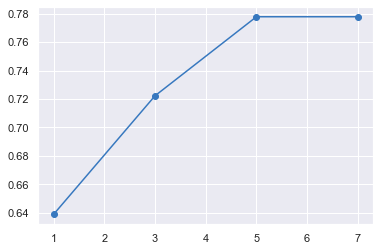

In [52]:
# KNeighborsClassifier.score is the same as sklearn.metrics.accuracy_score
scores = {k: v.score(X_val_std, y_val) for k, v in knn.items()}
print(scores)
# 05-Plot a graph showing how the accuracy on the validation set varies when changing K
fig, ax = plt.subplots()
ax.plot(k_values, list(scores.values()), '-o')

In [53]:
# 07-Use the best value of K and evaluate the model on the test set. How well does it works?
{k: knn[k].score(X_test_std, y_test) for k in knn.keys()}

{1: 0.7222222222222222,
 3: 0.7962962962962963,
 5: 0.7592592592592593,
 7: 0.7777777777777778}

{0.001: 0.3888888888888889, 0.01: 0.5277777777777778, 0.1: 0.6944444444444444, 1: 0.7777777777777778, 10: 0.8055555555555556, 100: 0.8055555555555556, 1000: 0.8055555555555556}


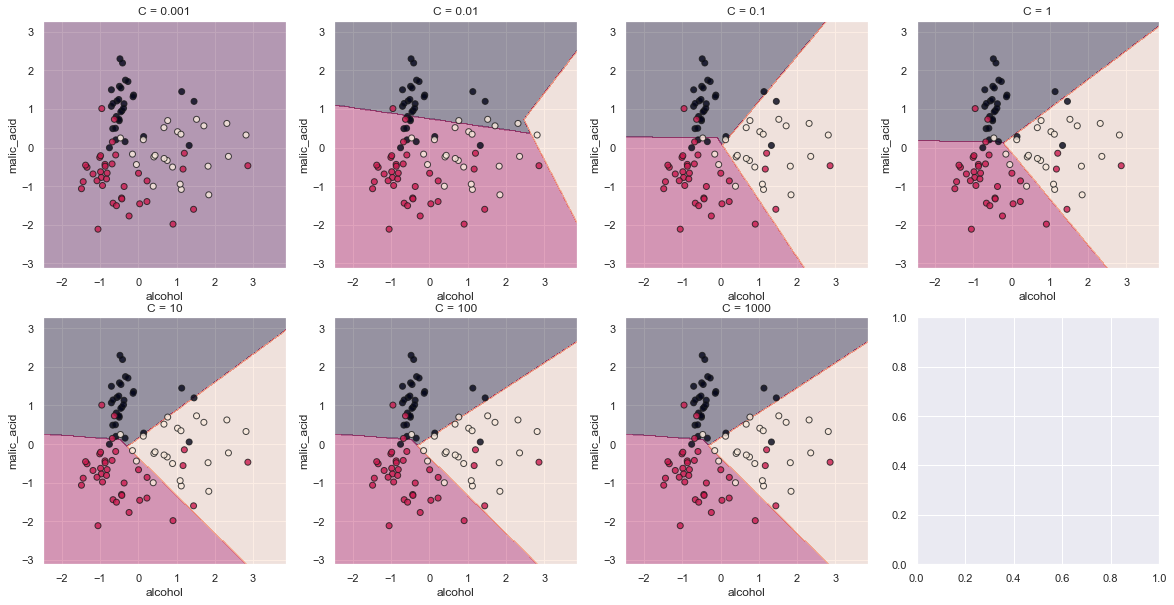

In [54]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_svc_dict = {c: SVC(kernel='linear', C=c).fit(X_train_std, y_train) for c in C_values}
#b. Plot the data and the decision boundaries
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for c, ax_ in zip(C_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, linear_svc_dict[c], ax_, 
                           f"C = {c}", data.feature_names[0], data.feature_names[1]);
linear_svc_scores_val = {c:svc.score(X_val_std, y_val) for c, svc in linear_svc_dict.items()}
print(linear_svc_scores_val)

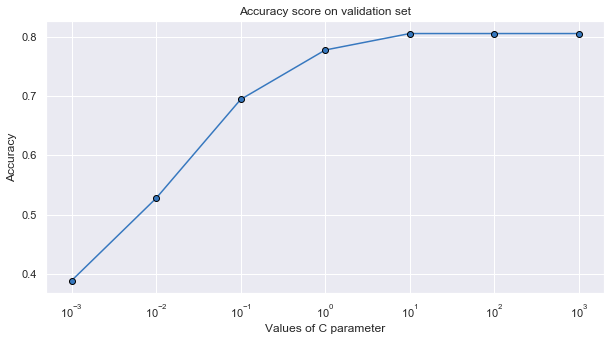

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Values of C parameter')
ax.set_ylabel('Accuracy')
plt.xticks(C_values)
plt.xscale('log')
ax.set_title("Accuracy score on validation set")
ax.plot(C_values, list(linear_svc_scores_val.values()), marker = 'o', markeredgecolor= 'black');

In [56]:
{c: svc.score(X_test_std, y_test) for c, svc in linear_svc_dict.items()}

{0.001: 0.3888888888888889,
 0.01: 0.6296296296296297,
 0.1: 0.7222222222222222,
 1: 0.7407407407407407,
 10: 0.7777777777777778,
 100: 0.7962962962962963,
 1000: 0.7962962962962963}

In [57]:
precision_recall_fscore_support(y_test, linear_svc_dict[10].predict(X_test_std))

(array([0.70833333, 0.94117647, 0.69230769]),
 array([0.89473684, 0.76190476, 0.64285714]),
 array([0.79069767, 0.84210526, 0.66666667]),
 array([19, 21, 14]))

{0.001: 0.3888888888888889, 0.01: 0.3888888888888889, 0.1: 0.7777777777777778, 1: 0.7777777777777778, 10: 0.7777777777777778, 100: 0.6944444444444444, 1000: 0.6944444444444444}


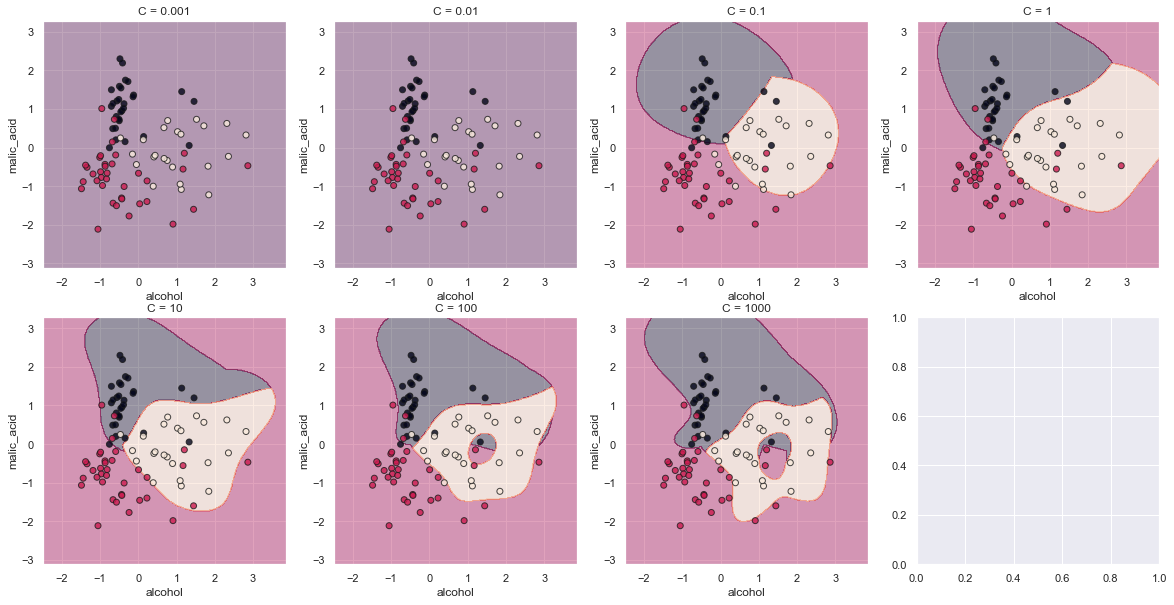

In [58]:
rbf_svc_dict = {c: SVC(C=c, kernel='rbf').fit(X_train_std, y_train) for c in C_values}
print({c: svc.score(X_val_std, y_val) for c, svc in rbf_svc_dict.items()})
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for c, ax_ in zip(C_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, rbf_svc_dict[c], ax_, 
                           f"C = {c}", data.feature_names[0], data.feature_names[1]);

In [59]:
rbf_svc_scores_val = {c: svc.score(X_val_std, y_val) for c, svc in rbf_svc_dict.items()}
print(rbf_svc_scores_val)

{0.001: 0.3888888888888889, 0.01: 0.3888888888888889, 0.1: 0.7777777777777778, 1: 0.7777777777777778, 10: 0.7777777777777778, 100: 0.6944444444444444, 1000: 0.6944444444444444}


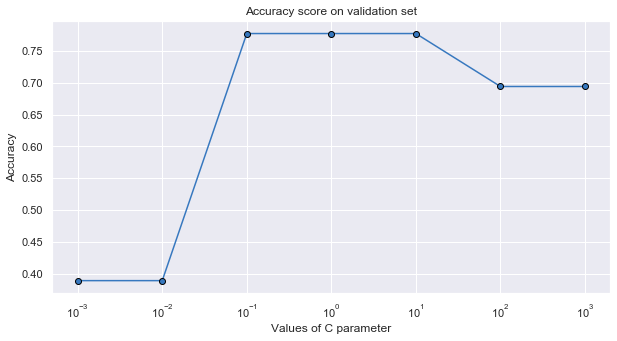

In [60]:
#plot Accuracy vs C value
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Values of C parameter')
ax.set_ylabel('Accuracy')
plt.xticks(C_values)
plt.xscale('log')
ax.set_title("Accuracy score on validation set")
ax.plot(C_values, list(rbf_svc_scores_val.values()), marker = 'o', markeredgecolor= 'black');

In [61]:
# 13-Evaluate the best C on the test set
{c: svc.score(X_test_std, y_test) for c, svc in rbf_svc_dict.items()}

{0.001: 0.3888888888888889,
 0.01: 0.3888888888888889,
 0.1: 0.7592592592592593,
 1: 0.8148148148148148,
 10: 0.7962962962962963,
 100: 0.8148148148148148,
 1000: 0.8148148148148148}

In [62]:
# note for gamma default is 'scale'  = 1 / (n_features * X.var()) ==> X_train_std.var()=1.0 then 'scale'=1/2
param_grid = {'C': list(np.arange(0.1, 10.5, 0.5)) + C_values,
              'gamma': np.arange(0.01, 1, 0.01)}

gridsearch = GridSearch(SVC(), param_grid, scoring='accuracy', n_jobs=-1, verbose=True)

res = gridsearch.fit(X_train_std, y_train, X_val, y_val)
print(res.best_params_)
print(res.best_estimator_)
print(res.best_score_)

Fitting 2772


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.5s


{'C': 100, 'gamma': 0.03}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8333333333333334


[Parallel(n_jobs=-1)]: Done 2772 out of 2772 | elapsed:    4.2s finished


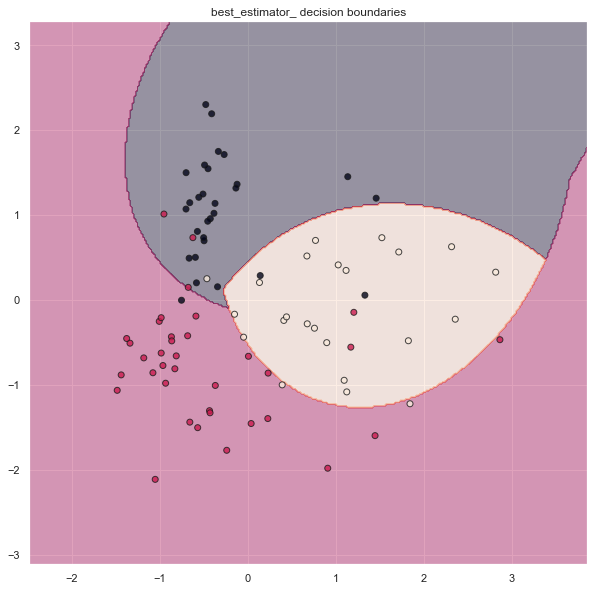

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_std, y_train, res.best_estimator_, ax, title="best_estimator_ decision boundaries")

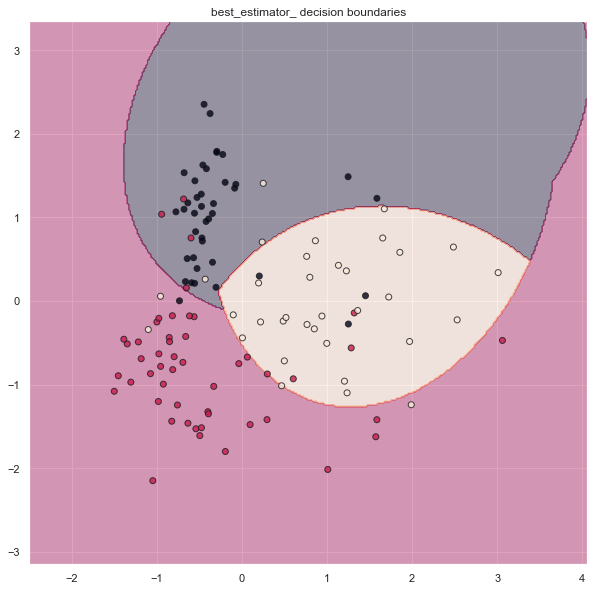

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_full_std, y_train_full, res.best_estimator_, ax, title="best_estimator_ decision boundaries")

In [65]:
res.best_estimator_.score(X_val_std, y_val)

0.8055555555555556

In [66]:
res.best_estimator_.score(X_test_std, y_test)

0.8148148148148148

In [67]:
precision_recall_fscore_support(y_test, res.best_estimator_.predict(X_test_std), average='weighted')

(0.8148148148148148, 0.8148148148148148, 0.8148148148148148, None)

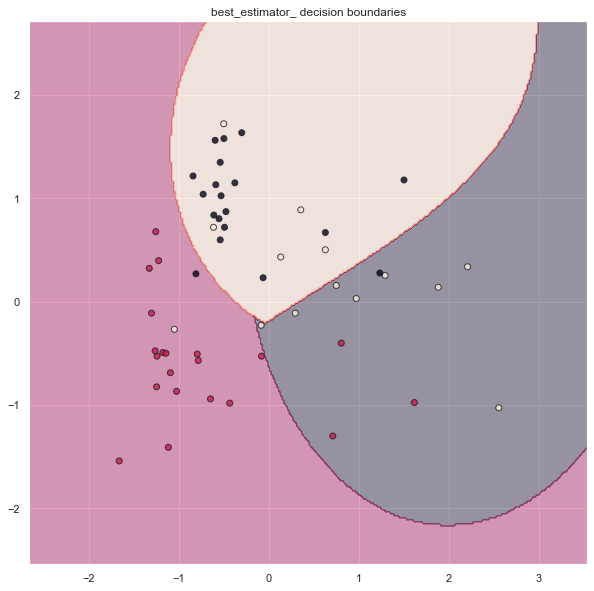

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_test_std, y_test, resCV.best_estimator_, ax, title="best_estimator_ decision boundaries")

In [70]:
kfold = KFold(5)
gridsearchCV = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=kfold, n_jobs=1, verbose=True)
resCV = gridsearchCV.fit(X_train_full_std, y_train_full)

Fitting 5 folds for each of 2772 candidates, totalling 13860 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 13860 out of 13860 | elapsed:   21.0s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [71]:
print(resCV.best_params_)
print(resCV.best_estimator_)
print(resCV.best_score_)

{'C': 0.1, 'gamma': 0.8300000000000001}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8300000000000001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.8306451612903226


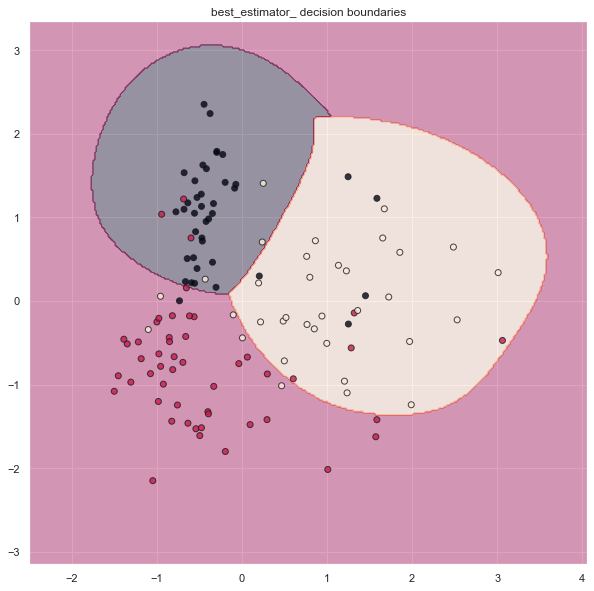

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_full_std, y_train_full, resCV.best_estimator_, ax, title="best_estimator_ decision boundaries")

In [73]:
resCV.best_estimator_.score(X_train_full_std, y_train_full)

0.8306451612903226

In [74]:
resCV.best_estimator_.score(X_test_full_std, y_test)

0.7962962962962963

In [75]:
precision_recall_fscore_support(y_test, res.best_estimator_.predict(X_test_full_std), average='weighted')

(0.8148148148148148, 0.8148148148148148, 0.8148148148148148, None)

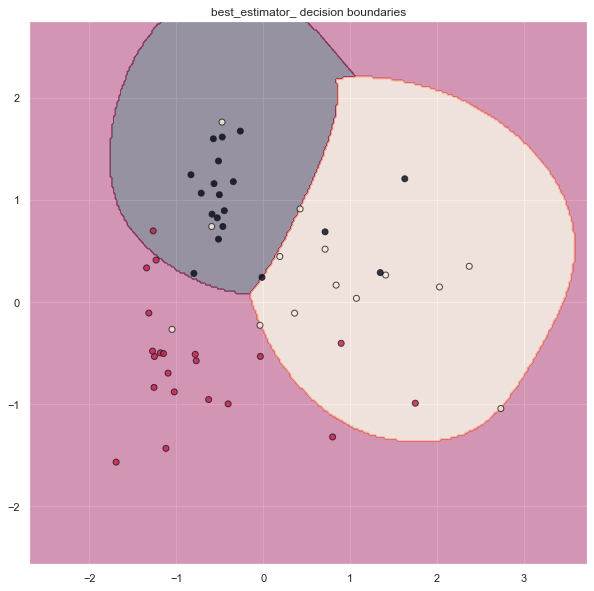

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_test_full_std, y_test, resCV.best_estimator_, ax, title="best_estimator_ decision boundaries")